In [1]:
import gym_mapf
import importlib
import matplotlib.pyplot as plt
gym_mapf = importlib.reload(gym_mapf)

In [7]:
map_file = 'gym_mapf/maps/empty-8-8/empty-8-8.map'
scen_file = 'gym_mapf/maps/empty-8-8/empty-8-8-even-1.scen'

env = gym_mapf.envs.mapf_env.MapfEnv(map_file, scen_file)
start_state = env.reset()
start_state

TypeError: 'int' object is not iterable

In [3]:
from PIL import Image, ImageDraw

height = 600
width = 600
image = Image.new(mode='L', size=(height, width), color=255)

# Draw some lines
draw = ImageDraw.Draw(image)
y_start = 0
y_end = image.height
step_size = int(image.width / 10)

for x in range(0, image.width, step_size):
    line = ((x, y_start), (x, y_end))
    draw.line(line, fill=128)

x_start = 0
x_end = image.width

for y in range(0, image.height, step_size):
    line = ((x_start, y), (x_end, y))
    draw.line(line, fill=128)

del draw

image.show()

In [3]:
from gym.envs.classic_control.rendering import *
import matplotlib.pyplot as plt

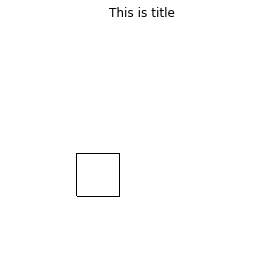

In [138]:
%matplotlib inline
from IPython import display

width = 250
height = 250
viewer = Viewer(width,height)

# cartwidth = 50.0
# cartheight = 30.0
# l,r,t,b = -cartwidth/2, cartwidth/2, cartheight/2, -cartheight/2
# cart = FilledPolygon([(l,b), (l,t), (r,t), (r,b)])
# viewer.add_geom(cart)

# viewer.draw_line((0, 125), (500, 125))
# v = [(50, 50), (100, 50), (100, 100), (50, 100), (50,50)]
viewer.draw_line((50, 50), (100, 50))
viewer.draw_line((100, 50), (100, 100))
viewer.draw_line((100, 100), (50, 100))
viewer.draw_line((50, 100), (50,50))

# viewer.draw_polygon(v, True)

img = viewer.render(return_rgb_array=True)
plt.figure(3)
plt.clf()
plt.imshow(img)
plt.title('This is title')
plt.axis('off')

display.display(plt.gcf())
display.clear_output(wait=True)

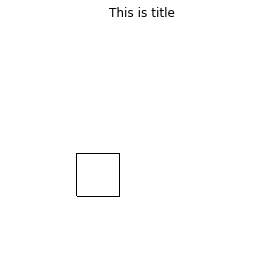

In [141]:
%matplotlib inline
from IPython import display
import pyglet
from pyglet.gl import *

width = 250
height = 250
window = pyglet.window.Window(width=width, height=height)

glEnable(GL_BLEND)
glBlendFunc(GL_SRC_ALPHA, GL_ONE_MINUS_SRC_ALPHA)

glClearColor(1,1,1,1)
glColor4f(*(0, 0, 0, 1.0))
window.clear()
window.switch_to()
window.dispatch_events()


def draw_line(start, end):
    glLineWidth(1)
    glBegin(GL_LINES)
    glVertex2f(*start)
    glVertex2f(*end)
    glEnd()

glPushMatrix()
# glTranslatef((0,0)[0], (0,0)[1], 0) # translate to GL loc ppint
# glRotatef(RAD2DEG * 0, 0, 0, 1.0)
# glScalef((1,1)[0], (1,1)[1], 1)

draw_line((50, 50), (100, 50))
draw_line((100, 50), (100, 100))
draw_line((100, 100), (50, 100))
draw_line((50, 100), (50,50))

glPopMatrix()

arr = None
buffer = pyglet.image.get_buffer_manager().get_color_buffer()
image_data = buffer.get_image_data()
arr = np.frombuffer(image_data.data, dtype=np.uint8)
# In https://github.com/openai/gym-http-api/issues/2, we
# discovered that someone using Xmonad on Arch was having
# a window of size 598 x 398, though a 600 x 400 window
# was requested. (Guess Xmonad was preserving a pixel for
# the boundary.) So we use the buffer height/width rather
# than the requested one.
arr = arr.reshape(buffer.height, buffer.width, 4)
arr = arr[::-1,:,0:3]
window.flip()


plt.figure(3)
plt.clf()
plt.imshow(arr)
plt.title('This is title')
plt.axis('off')

display.display(plt.gcf())
display.clear_output(wait=True)

In [125]:
arr

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]